<a href="https://colab.research.google.com/github/harsh-jaiswal13/MACHINE_Learning/blob/main/fashion_MNIST_classification_using_cnn_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Layer
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping


In [13]:
num_classes =10
input_shape=(28,28,1)

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255


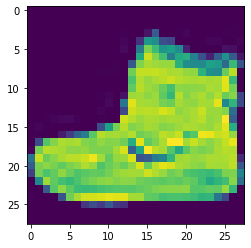

In [12]:
x_train[0]
plt.imshow(x_train[0])

In [14]:
print(x_train.shape)
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

print("x_train shape: ",x_train.shape)

# print("y_train[0]:" ,y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train[0]:" ,y_train[0])


(60000, 28, 28)
x_train shape:  (60000, 28, 28, 1)
y_train[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [15]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:

print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")
print("y_train[0]:" ,y_train[0])
# print("y_train[0]:" ,y_train[0])


60000 train samples
10000 test samples
y_train[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
x_train[0]

In [17]:
type(x_train)

numpy.ndarray

In [18]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten(input_shape=(28,28,1)))
model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(.4))

model.add(Dense(128,activation='relu'))
model.add(Dropout(.3))

model.add(Dense(64,activation='relu'))

model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [19]:
batch_size = 150
epochs = 120
callback = EarlyStopping(monitor="val_loss",min_delta=0.00001,patience=20,verbose=1,mode="auto",baseline=None,restore_best_weights=False)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.1,callbacks=callback)

Epoch 1/120
360/360 [==============================] - 12s 6ms/step - loss: 0.6750 - accuracy: 0.7509 - val_loss: 0.4212 - val_accuracy: 0.8452
Epoch 2/120
360/360 [==============================] - 2s 5ms/step - loss: 0.4236 - accuracy: 0.8469 - val_loss: 0.3528 - val_accuracy: 0.8708
Epoch 3/120
360/360 [==============================] - 2s 6ms/step - loss: 0.3604 - accuracy: 0.8704 - val_loss: 0.3154 - val_accuracy: 0.8843
Epoch 4/120
360/360 [==============================] - 2s 6ms/step - loss: 0.3212 - accuracy: 0.8832 - val_loss: 0.2981 - val_accuracy: 0.8887
Epoch 5/120
360/360 [==============================] - 2s 6ms/step - loss: 0.3000 - accuracy: 0.8908 - val_loss: 0.2790 - val_accuracy: 0.9003
Epoch 6/120
360/360 [==============================] - 2s 6ms/step - loss: 0.2765 - accuracy: 0.8990 - val_loss: 0.2660 - val_accuracy: 0.9042
Epoch 7/120
360/360 [==============================] - 2s 6ms/step - loss: 0.2599 - accuracy: 0.9047 - val_loss: 0.2571 - val_accuracy: 0.906

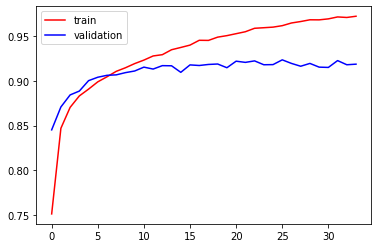

In [20]:
plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
# val_accuracy: 0.9930

In [25]:
# y_pred = keras.utils.to_categorical(y_pred, num_classes)
score = model.evaluate(x_test, y_test, verbose=0)

In [22]:
score

[0.34505099058151245, 0.9135000109672546]

In [26]:
# input_dim=784
mod=Sequential()
mod.add(Flatten(input_shape=(28,28,1)))
mod.add(Dense(256,activation='relu'))
mod.add(Dense(128,activation='relu'))
mod.add(Dense(64,activation='relu'))
mod.add(Dense(10, activation='sigmoid'))

Epoch 1/120
360/360 [==============================] - 5s 12ms/step - loss: 0.0690 - accuracy: 0.9741 - val_loss: 0.3482 - val_accuracy: 0.9212
Epoch 2/120
360/360 [==============================] - 3s 7ms/step - loss: 0.0663 - accuracy: 0.9746 - val_loss: 0.3410 - val_accuracy: 0.9215
Epoch 3/120
360/360 [==============================] - 2s 6ms/step - loss: 0.0636 - accuracy: 0.9749 - val_loss: 0.3368 - val_accuracy: 0.9227
Epoch 4/120
360/360 [==============================] - 2s 6ms/step - loss: 0.0638 - accuracy: 0.9763 - val_loss: 0.3624 - val_accuracy: 0.9188
Epoch 5/120
360/360 [==============================] - 2s 6ms/step - loss: 0.0594 - accuracy: 0.9775 - val_loss: 0.3486 - val_accuracy: 0.9170
Epoch 6/120
360/360 [==============================] - 2s 6ms/step - loss: 0.0620 - accuracy: 0.9766 - val_loss: 0.3554 - val_accuracy: 0.9205
Epoch 7/120
360/360 [==============================] - 2s 6ms/step - loss: 0.0561 - accuracy: 0.9784 - val_loss: 0.3748 - val_accuracy: 0.921

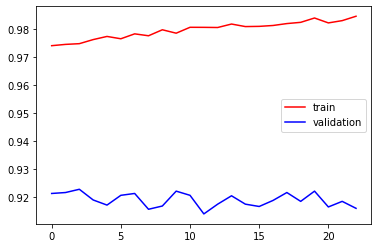